<a href="https://colab.research.google.com/github/Dhanush-S-Gowda/Comparitive_analysis_of_llms/blob/main/Comparitive_analysis_of_llms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up the Environment

In [ ]:
!pip install transformers
!pip install datasets
!pip install rouge-score
!pip install sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

## Loading and Preprocessing the Data

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

## Loading Pre-trained Models

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration, PegasusTokenizer, PegasusForConditionalGeneration

# Load BART model and tokenizer
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Load T5 model and tokenizer
t5_tokenizer = T5Tokenizer.from_pretrained('t5-large')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-large')

# Load Pegasus model and tokenizer
pegasus_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-cnn_dailymail')
pegasus_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-cnn_dailymail')


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

## Generating Summaries

In [ ]:
def generate_summary(text, model, tokenizer, max_length=150):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

## Evaluating the Performance

In [ ]:
from rouge_score import rouge_scorer
import sacrebleu

def evaluate_summary(model, tokenizer, data, num_samples=100):
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {'rouge1': 0, 'rouge2': 0, 'rougeL': 0}
    bleu_scores = []

    for i in range(num_samples):
        article = data['test'][i]['article']
        reference_summary = data['test'][i]['highlights']
        generated_summary = generate_summary(article, model, tokenizer)

        #ROUGE scores
        rouge_score = rouge_scorer_instance.score(reference_summary, generated_summary)
        for key in rouge_scores:
            rouge_scores[key] += rouge_score[key].fmeasure

        # SacreBLEU score
        bleu_score = sacrebleu.corpus_bleu([generated_summary], [[reference_summary]])
        bleu_scores.append(bleu_score.score)

    # Average ROUGE scores
    for key in rouge_scores:
        rouge_scores[key] /= num_samples

    # Average SacreBLEU score
    average_bleu_score = sum(bleu_scores) / num_samples

    return rouge_scores, average_bleu_score


## Comparing the Results

In [ ]:
num_samples = 10

# Evaluate BART
bart_rouge_scores, bart_bleu_score = evaluate_summary(bart_model, bart_tokenizer, dataset, num_samples)
print("BART ROUGE Scores:", bart_rouge_scores)
print("BART SacreBLEU Score:", bart_bleu_score)

# Evaluate T5
t5_rouge_scores, t5_bleu_score = evaluate_summary(t5_model, t5_tokenizer, dataset, num_samples)
print("T5 ROUGE Scores:", t5_rouge_scores)
print("T5 SacreBLEU Score:", t5_bleu_score)

# Evaluate Pegasus
pegasus_rouge_scores, pegasus_bleu_score = evaluate_summary(pegasus_model, pegasus_tokenizer, dataset, num_samples)
print("Pegasus ROUGE Scores:", pegasus_rouge_scores)
print("Pegasus SacreBLEU Score:", pegasus_bleu_score)


BART ROUGE Scores: {'rouge1': 0.36918338134893214, 'rouge2': 0.15061471455566428, 'rougeL': 0.26829820373336605}
BART SacreBLEU Score: 11.098357080741206
T5 ROUGE Scores: {'rouge1': 0.33219820944831013, 'rouge2': 0.1132606250098537, 'rougeL': 0.24449658713356107}
T5 SacreBLEU Score: 6.461592519688283
Pegasus ROUGE Scores: {'rouge1': 0.380079761825941, 'rouge2': 0.17236420848283027, 'rougeL': 0.2745209334242396}
Pegasus SacreBLEU Score: 10.086461196079796


<ipython-input-10-65b6b4a93779>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=bleu_scores, ax=axes[1], palette='viridis')


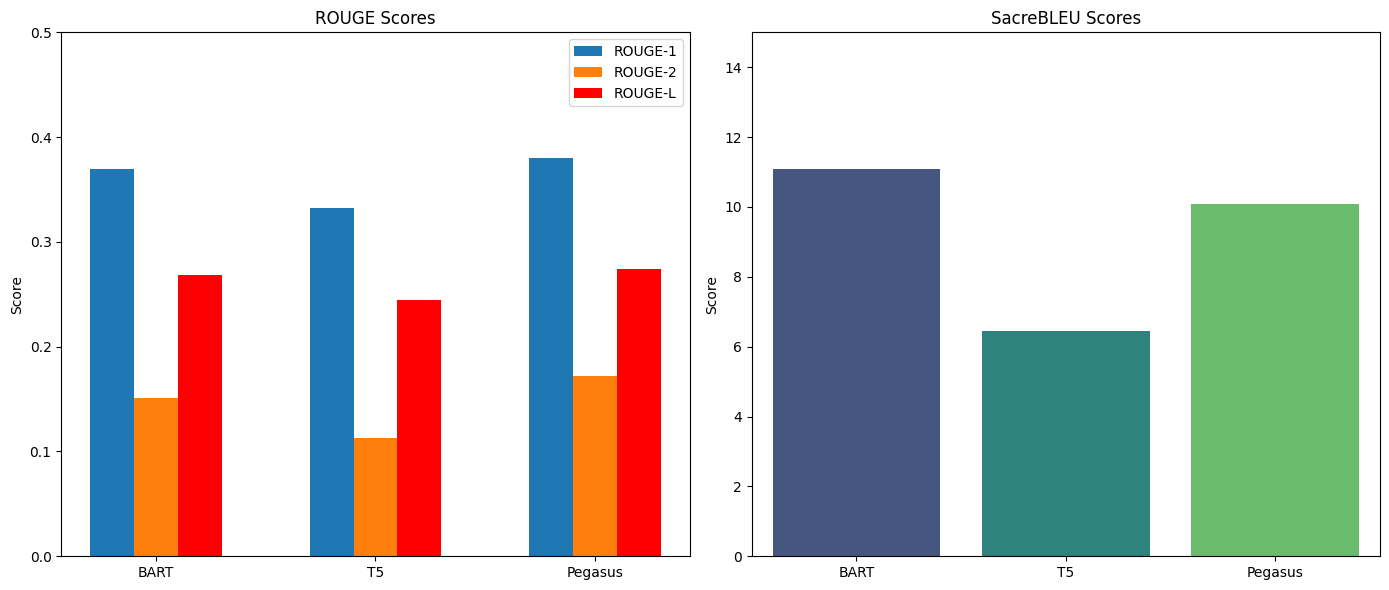

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
models = ['BART', 'T5', 'Pegasus']
rouge1_scores = [bart_rouge_scores['rouge1'], t5_rouge_scores['rouge1'], pegasus_rouge_scores['rouge1']]
rouge2_scores = [bart_rouge_scores['rouge2'], t5_rouge_scores['rouge2'], pegasus_rouge_scores['rouge2']]
rougeL_scores = [bart_rouge_scores['rougeL'], t5_rouge_scores['rougeL'], pegasus_rouge_scores['rougeL']]
bleu_scores = [bart_bleu_score, t5_bleu_score, pegasus_bleu_score]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROUGE Scores Plot
width = 0.2
x = range(len(models))
axes[0].bar([p - width for p in x], rouge1_scores, width=width, label='ROUGE-1', align='center')
axes[0].bar(x, rouge2_scores, width=width, label='ROUGE-2', align='center')
axes[0].bar([p + width for p in x], rougeL_scores, width=width, label='ROUGE-L', align='center', color='r')
axes[0].set_title('ROUGE Scores')
axes[0].set_ylabel('Score')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylim(0, 0.5)
axes[0].legend()

# SacreBLEU Scores Plot
sns.barplot(x=models, y=bleu_scores, ax=axes[1], palette='viridis')
axes[1].set_title('SacreBLEU Scores')
axes[1].set_ylabel('Score')
axes[1].set_ylim(0, 15)

plt.tight_layout()
plt.show()